<a href="https://colab.research.google.com/github/mikeninerbravog/dio_provas_poc/blob/master/(ver_2)_ProjetoFinalDIOBootCamp_Fev2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
"""
pt-BR
Aluno: Marcello S Bastos - "Mike Niner Bravog".
Projeto/Prova de Conceito (POC) para Bootcamp DIO "Machine Learning Practitioner" - Fevereiro de 2025
Transfer Learning com VGG16, classificando imagens de "Coca-cola" e "Pepsi"
"""

# Configuração de ambiente e importações
from google.colab import drive
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, applications
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

In [6]:
# Partição do Google Drive preparada para o serviço
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/Coca_Pepsi_MLDLTL'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Carregamento do Dataset

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 178 files belonging to 2 classes.
Using 143 files for training.
Found 178 files belonging to 2 classes.
Using 35 files for validation.


In [8]:
# Configuração do modelo VGG16, seguindo o recomendado no enunciado da prova.

base_model = applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,137,986 (80.64 MB)

 Trainable params: 6,423,298 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [9]:
# Modo de treinamento, ajuste fino e setagem do número de épocas
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 9s/step - accuracy: 0.6278 - loss: 48.3714 - val_accuracy: 0.8286 - val_loss: 4.3424
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.8625 - loss: 14.3291 - val_accuracy: 0.9714 - val_loss: 3.3976
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 228ms/step - accuracy: 0.9650 - loss: 3.2882 - val_accuracy: 0.9143 - val_loss: 7.3302
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - accuracy: 0.9946 - loss: 0.4629 - val_accuracy: 0.9714 - val_loss: 3.7236
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9714 - val_loss: 2.9753
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9714 - val_loss: 2.5042
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9714 - val_loss: 2.2083
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.

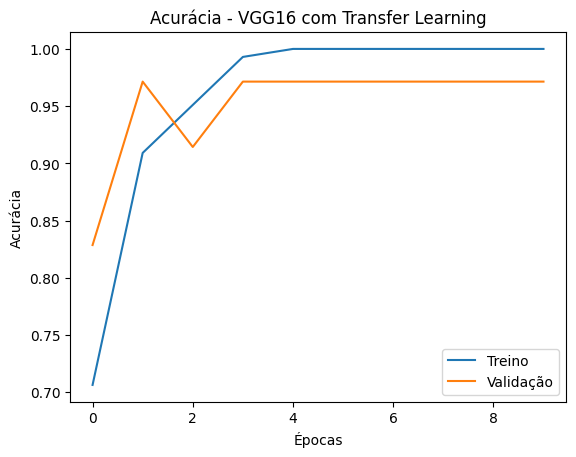

In [10]:
# Plotagem do desempenho

plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Acurácia - VGG16 com Transfer Learning')
plt.show()

In [11]:
# Salvando o modelo na pasta de trabalho
model.save('/content/drive/MyDrive/coke_pepsi_model_vgg16.h5')